In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import pickle
from sklearn.metrics import pairwise_distances, pairwise_kernels
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF
import networkx as nx
from tqdm.notebook import tqdm

import os
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) 

import pandas as pd

import copy


import hypernetx as hnx

import pygenstability as pgs
from pygenstability import plotting

In [3]:
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

import scipy as sc
import scipy.sparse as sp

In [4]:
# CHECKPOINT
edges_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Europe.pkl', 'rb'))
edges_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Asia.pkl', 'rb'))
edges_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Africa.pkl', 'rb'))
edges_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Americas.pkl', 'rb'))

In [5]:
# CHECKPOINT
Adj2_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_e.pkl', 'rb'))
Adj2_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_as.pkl', 'rb'))
Adj2_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_af.pkl', 'rb'))
Adj2_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_am.pkl', 'rb'))

In [6]:
# CHECKPOINT
Aw_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_e.pkl', 'rb'))
Aw_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_as.pkl', 'rb'))
Aw_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_af.pkl', 'rb'))
Aw_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_am.pkl', 'rb'))

In [7]:
def get_adjacency(H):
    
    """ Construct weighted adjacency matrix for HyperGraph H
    
    Arguments
    H : Hypernetx hypergraph object
    
    """

    incidence = H.incidence_matrix().toarray()
    
    # hyperedge adjacency matrix
    C = np.matmul(incidence.T,incidence)
    A = np.matmul(incidence,incidence.T)

    R = np.matmul(incidence, np.matmul(np.diag(np.diag(C)),incidence.T))

    # defining transition matrix
    adj = R - A
    np.fill_diagonal(adj,0)

    
    return adj

In [41]:
def compute_and_plot_eigenvector_hypergraph(g, pos, n_labels, weight=True):
    g.edges(data=True)
    if weight==True:
        ec = nx.eigenvector_centrality(g, weight='weight')
    else:
        ec = nx.eigenvector_centrality(g)
    colors = list(ec.values())

    cmap=plt.cm.Blues
    vmin = min(colors)
    vmax = max(colors)
    nx.draw(g,pos=pos,node_size=800,node_color=colors,cmap=cmap,vmin=vmin, vmax=vmax)
    labels=nx.draw_networkx_labels(g,pos, labels=n_labels)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = vmin, vmax=vmax))
    sm._A = []
    plt.colorbar(sm)
    plt.show()
    
    return ec

# America

## Hypergraph

In [63]:
H_am = hnx.Hypergraph(edges_am)

# weighted adjacency matrix
graph_am = sp.csr_matrix(get_adjacency(H_am))

# construct network object just for plotting
g_am = nx.Graph(graph_am)
pos_am_h = nx.circular_layout(g_am, scale=1)

# node names
H_am.nodes

EntitySet(_:Nodes,['14', '8', '17', '5', '1', '12', '4', '16', '15', '7', '11', '2', '9', '10', '13', '3', '6'],{})

In [64]:
# create dictionary with node names
n_labels_am = {}
nodes_am = ['14', '8', '17', '5', '1', '12', '4', '16', '15', '7', '11', '2', '9', '10', '13', '3', '6']
for i in range(len(nodes_am)):
    n_labels_am[i] = nodes_am[i]

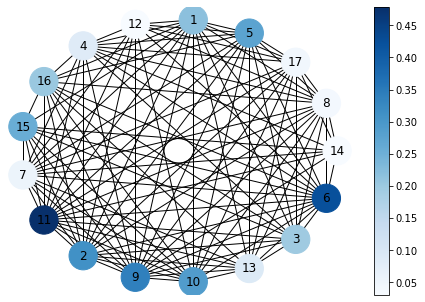

In [65]:
ec_am = compute_and_plot_eigenvector_hypergraph(g_am, pos_am_h, n_labels_am)

## 3-way edges

In [66]:
Ham_restrict_edges3 = H_am.restrict_to_edges(list(e for e in edges_am if len(edges_am[e])==3))

# weighted adjacency matrix
graph_am3 = sp.csr_matrix(get_adjacency(Ham_restrict_edges3))

# construct network object for plotting
g_am3 = nx.Graph(graph_am3)
pos_am3 = nx.circular_layout(g_am3, scale=1)

# node names
Ham_restrict_edges3.nodes

EntitySet(_:Nodes,['14', '8', '17', '5', '1', '12', '7', '4', '15', '13', '9', '2', '10', '11', '3', '6'],{})

In [67]:
# create dictionary with node names
n_labels_am3 = {}
nodes_am3 = ['14', '8', '17', '5', '1', '12', '7', '4', '15', '13', '9', '2', '10', '11', '3', '6']
for i in range(len(nodes_am3)):
    n_labels_am3[i] = nodes_am3[i]

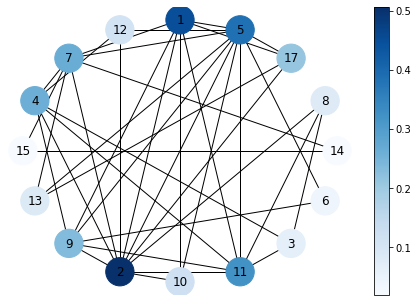

In [68]:
ec_am3 = compute_and_plot_eigenvector_hypergraph(g_am3, pos_am3, n_labels_am3)

# Europe

## Hypergraph

In [54]:
H_e = hnx.Hypergraph(edges_e)

# weighted adjacency matrix
graph_e = sp.csr_matrix(get_adjacency(H_e))

# construct network object just for plotting
g_e = nx.Graph(graph_e)
pos_e_h = nx.circular_layout(g_e, scale=1)

# node names
H_e.nodes

EntitySet(_:Nodes,['14', '8', '17', '5', '1', '12', '4', '7', '16', '15', '13', '2', '9', '10', '11', '3', '6'],{})

In [55]:
# create dictionary with node names
n_labels_e = {}
nodes_e = ['14', '8', '17', '5', '1', '12', '4', '7', '16', '15', '13', '2', '9', '10', '11', '3', '6']
for i in range(len(nodes_e)):
    n_labels_e[i] = nodes_e[i]

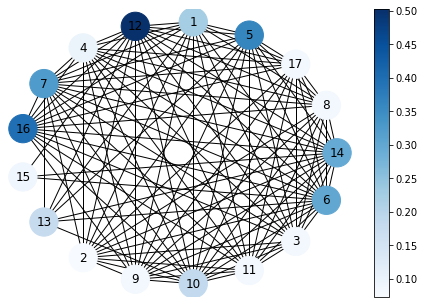

In [56]:
ec_e = compute_and_plot_eigenvector_hypergraph(g_e, pos_e_h, n_labels_e)

# 3-way edges

In [57]:
He_restrict_edges3 = H_e.restrict_to_edges(list(e for e in edges_e if len(edges_e[e])==3))

# weighted adjacency matrix
graph_e3 = sp.csr_matrix(get_adjacency(He_restrict_edges3))

# construct network object for plotting
g_e3 = nx.Graph(graph_e3)
pos_e3 = nx.circular_layout(g_e3, scale=1)

# node names
He_restrict_edges3.nodes

EntitySet(_:Nodes,['14', '5', '1', '12', '7', '16', '4', '10', '13', '6'],{})

In [58]:
# create dictionary with node names
n_labels_e3 = {}
nodes_e3 = ['14', '5', '1', '12', '7', '16', '4', '10', '13', '6']
for i in range(len(nodes_e3)):
    n_labels_e3[i] = nodes_e3[i]

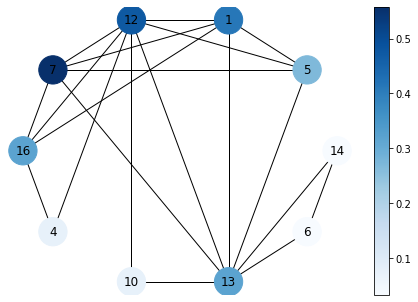

In [59]:
ec_e3 = compute_and_plot_eigenvector_hypergraph(g_e3, pos_e3, n_labels_e3)

# Asia

## Hypergraph

In [48]:
H_as = hnx.Hypergraph(edges_as)

# weighted adjacency matrix
graph_as = sp.csr_matrix(get_adjacency(H_as))

# construct network object just for plotting
g_as = nx.Graph(graph_as)
pos_as_h = nx.circular_layout(g_as, scale=1)

# node names
H_as.nodes

EntitySet(_:Nodes,['14', '8', '17', '5', '1', '12', '7', '16', '4', '15', '13', '2', '9', '10', '11', '3', '6'],{})

In [49]:
# create dictionary with node names
n_labels_as = {}
nodes_as = ['14', '8', '17', '5', '1', '12', '7', '16', '4', '15', '13', '2', '9', '10', '11', '3', '6']
for i in range(len(nodes_as)):
    n_labels_as[i] = nodes_as[i]

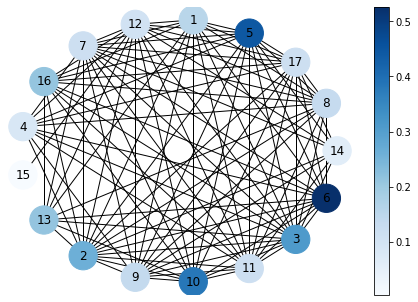

In [50]:
ec_as = compute_and_plot_eigenvector_hypergraph(g_as, pos_as_h, n_labels_as)

## 3-way edges

In [51]:
Has_restrict_edges3 = H_as.restrict_to_edges(list(e for e in edges_as if len(edges_as[e])==3))

# weighted adjacency matrix
graph_as3 = sp.csr_matrix(get_adjacency(Has_restrict_edges3))

# construct network object for plotting
g_as3 = nx.Graph(graph_as3)
pos_as3 = nx.circular_layout(g_as3, scale=1)

# node names
Has_restrict_edges3.nodes

EntitySet(_:Nodes,['8', '5', '1', '2', '9', '10', '13', '3', '6'],{})

In [52]:
# create dictionary with node names
n_labels_as3 = {}
nodes_as3 = ['8', '5', '1', '2', '9', '10', '13', '3', '6']
for i in range(len(nodes_as3)):
    n_labels_as3[i] = nodes_as3[i]

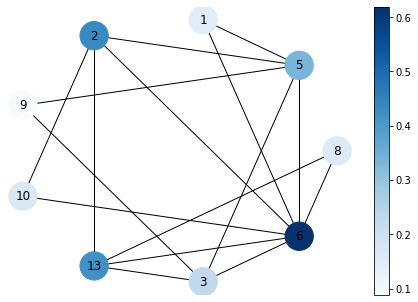

In [53]:
ec_as3 = compute_and_plot_eigenvector_hypergraph(g_as3, pos_as3, n_labels_as3)

# Africa
## Hypergraph

In [69]:
H_af = hnx.Hypergraph(edges_af)

# weighted adjacency matrix
graph_af = sp.csr_matrix(get_adjacency(H_af))

# construct network object just for plotting
g_af = nx.Graph(graph_af)
pos_af_h = nx.circular_layout(g_af, scale=1)

# node names
H_af.nodes

EntitySet(_:Nodes,['14', '8', '17', '5', '1', '12', '4', '16', '7', '15', '13', '2', '9', '10', '11', '3', '6'],{})

In [70]:
# create dictionary with node names
n_labels_af = {}
nodes_af = ['14', '8', '17', '5', '1', '12', '4', '16', '7', '15', '13', '2', '9', '10', '11', '3', '6']
for i in range(len(nodes_af)):
    n_labels_af[i] = nodes_af[i]

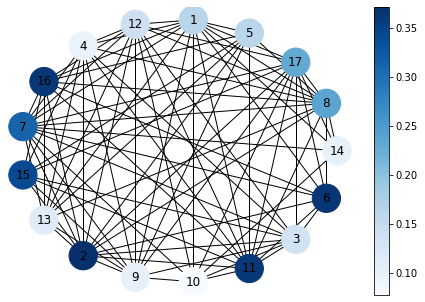

In [71]:
ec_af = compute_and_plot_eigenvector_hypergraph(g_af, pos_af_h, n_labels_af)

## 3-way edges

In [72]:
Haf_restrict_edges3 = H_af.restrict_to_edges(list(e for e in edges_af if len(edges_af[e])==3))

# weighted adjacency matrix
graph_af3 = sp.csr_matrix(get_adjacency(Haf_restrict_edges3))

# construct network object for plotting
g_af3 = nx.Graph(graph_af3)
pos_af3 = nx.circular_layout(g_af3, scale=1)

# node names
Haf_restrict_edges3.nodes

EntitySet(_:Nodes,['14', '8', '17', '5', '1', '11', '7', '12', '15', '16', '9', '2', '10', '13', '3', '6'],{})

In [73]:
# create dictionary with node names
n_labels_af3 = {}
nodes_af3 = ['14', '8', '17', '5', '1', '11', '7', '12', '15', '16', '9', '2', '10', '13', '3', '6']
for i in range(len(nodes_af3)):
    n_labels_af3[i] = nodes_af3[i]

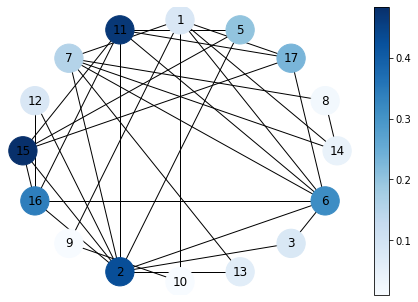

In [74]:
ec_af3 = compute_and_plot_eigenvector_hypergraph(g_af3, pos_af3, n_labels_af3)